In [2]:
import numpy as np
import networkx as nx
import torch
import matplotlib.pyplot as plt
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv

In [ ]:
np.random.seed(1009)
k = 12  # Number of nodes
G = nx.barabasi_albert_graph(k, m=1)  # m=2 means each new node attaches to 2 existing nodes
# Create the adjacency matrix
adj_matrix = nx.to_numpy_array(G)
nx.draw(G,with_labels = True)


# Parameters
T = 50  # Time steps
start_node = 0  # Node where the anomaly will start
anomaly_start_time = 10  # Time when the anomaly starts at start_node
anomaly_decay_rate = 0.15  # Rate at which the anomaly decays as it spreads
anomaly_magnitude = 10  # Magnitude of the initial anomaly
max_anomaly_per_node = 50  # Maximum anomaly each node can experience (to avoid runaway)


# Generate time series for each node with a controlled, delayed anomaly propagation
def generate_spatiotemporal_series(k, T, anomaly_start_time, anomaly_magnitude, anomaly_decay_rate, max_anomaly_per_node):
    time_series = np.zeros((k, T))
    
    # For simplicity, let's initialize the nodes with random values
    node_values = np.random.rand(k) * 5
    
    # Create a list to track the amount of anomaly that reaches each node at each time step
    anomaly_propagation = np.zeros((k, T))  # This will track how the anomaly spreads over time
    
    # Introduce the anomaly at the start node at the specified time
    anomaly_propagation[start_node, anomaly_start_time:] = anomaly_magnitude
    time_series[start_node, anomaly_start_time:] += anomaly_magnitude

    # Spread the anomaly to neighboring nodes with a delay over multiple time steps
    for t in range(anomaly_start_time + 1, T):
        for node in range(k):
            # For each node, check if it was affected in previous time steps
            for neighbor in G.neighbors(node):
                # If the neighbor had an anomaly at time t-1, this node will now start receiving it
                if anomaly_propagation[neighbor, t - 1] > 0:
                    # Spread the anomaly with a controlled decay rate to the current node
                    new_anomaly = anomaly_propagation[neighbor, t - 1] * anomaly_decay_rate
                    
                    # Cap the anomaly to avoid runaway values
                    if anomaly_propagation[node, t] + new_anomaly > max_anomaly_per_node:
                        new_anomaly = max_anomaly_per_node - anomaly_propagation[node, t]
                    
                    anomaly_propagation[node, t] += new_anomaly
                    time_series[node, t] += new_anomaly
    
    # Add the normal fluctuation (without anomaly) to each node
    for t in range(T):
        for node in range(k):
            time_series[node, t] += node_values[node] + np.sin(t / 10) * 0.1  # Normal fluctuation
    
    return time_series

# Generate time series with delayed anomalies
time_series_data = generate_spatiotemporal_series(k, T, anomaly_start_time, anomaly_magnitude, anomaly_decay_rate, max_anomaly_per_node)

# Plot the time series for the nodes
plt.figure(figsize=(12, 6))
for i in range(k):
    plt.plot(time_series_data[i], label=f"Node {i}", alpha=0.6)
plt.xlabel("Time Steps")
plt.ylabel("Value")
plt.title("Spatiotemporal Time Series with Controlled Delayed Anomalous Spikes")
plt.legend()
plt.show()

# Convert the time series into a format suitable for graph neural networks
# Create PyTorch tensors for features and adjacency
x = torch.tensor(time_series_data.T, dtype=torch.float)  # (T x k), each row is a time step
edge_index = torch.tensor(np.array(list(G.edges())).T, dtype=torch.long)  # (2 x E), graph connectivity

# Create a Data object for PyTorch Geometric
data = Data(x=x, edge_index=edge_index)


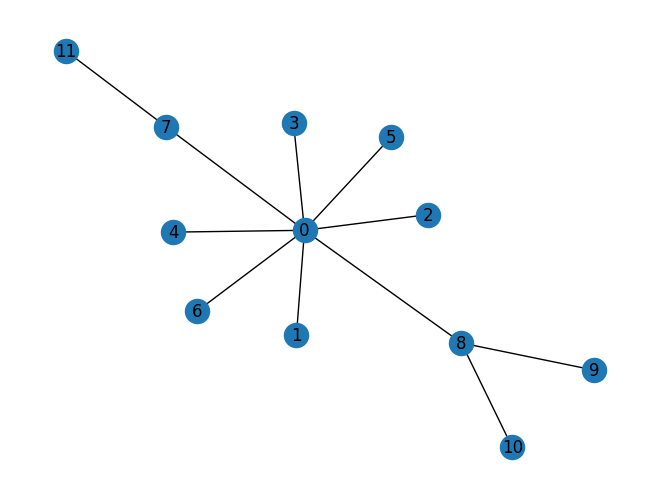

In [104]:
np.random.seed(1009)
k = 12  # Number of nodes
G = nx.barabasi_albert_graph(k, m=1)  # m=2 means each new node attaches to 2 existing nodes
# Create the adjacency matrix
adj_matrix = nx.to_numpy_array(G)
nx.draw(G,with_labels = True)

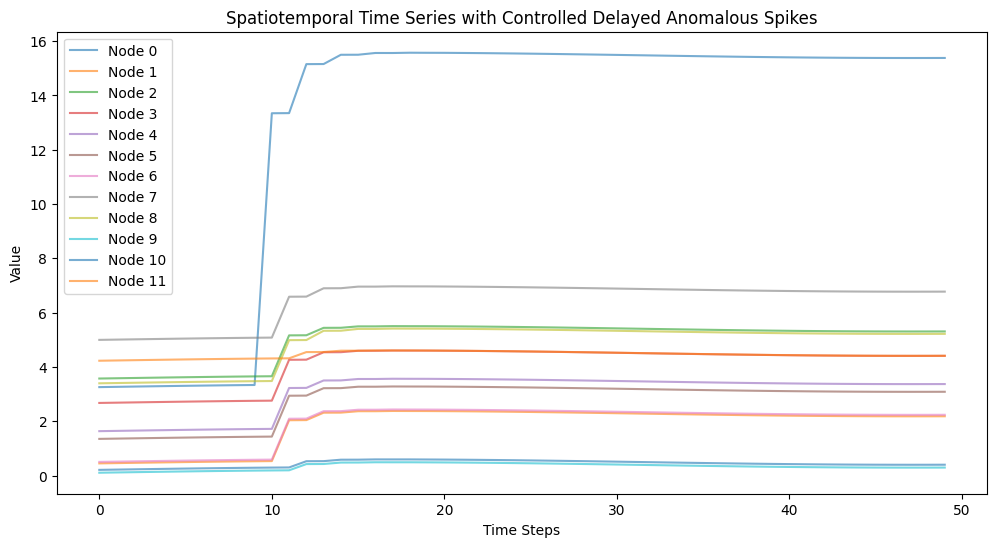

In [105]:

# Parameters
T = 50  # Time steps
start_node = 0  # Node where the anomaly will start
anomaly_start_time = 10  # Time when the anomaly starts at start_node
anomaly_decay_rate = 0.15  # Rate at which the anomaly decays as it spreads
anomaly_magnitude = 10  # Magnitude of the initial anomaly
max_anomaly_per_node = 50  # Maximum anomaly each node can experience (to avoid runaway)


# Generate time series for each node with a controlled, delayed anomaly propagation
def generate_spatiotemporal_series(k, T, anomaly_start_time, anomaly_magnitude, anomaly_decay_rate, max_anomaly_per_node):
    time_series = np.zeros((k, T))
    
    # For simplicity, let's initialize the nodes with random values
    node_values = np.random.rand(k) * 5
    
    # Create a list to track the amount of anomaly that reaches each node at each time step
    anomaly_propagation = np.zeros((k, T))  # This will track how the anomaly spreads over time
    
    # Introduce the anomaly at the start node at the specified time
    anomaly_propagation[start_node, anomaly_start_time:] = anomaly_magnitude
    time_series[start_node, anomaly_start_time:] += anomaly_magnitude

    # Spread the anomaly to neighboring nodes with a delay over multiple time steps
    for t in range(anomaly_start_time + 1, T):
        for node in range(k):
            # For each node, check if it was affected in previous time steps
            for neighbor in G.neighbors(node):
                # If the neighbor had an anomaly at time t-1, this node will now start receiving it
                if anomaly_propagation[neighbor, t - 1] > 0:
                    # Spread the anomaly with a controlled decay rate to the current node
                    new_anomaly = anomaly_propagation[neighbor, t - 1] * anomaly_decay_rate
                    
                    # Cap the anomaly to avoid runaway values
                    if anomaly_propagation[node, t] + new_anomaly > max_anomaly_per_node:
                        new_anomaly = max_anomaly_per_node - anomaly_propagation[node, t]
                    
                    anomaly_propagation[node, t] += new_anomaly
                    time_series[node, t] += new_anomaly
    
    # Add the normal fluctuation (without anomaly) to each node
    for t in range(T):
        for node in range(k):
            time_series[node, t] += node_values[node] + np.sin(t / 10) * 0.1  # Normal fluctuation
    
    return time_series

# Generate time series with delayed anomalies
time_series_data = generate_spatiotemporal_series(k, T, anomaly_start_time, anomaly_magnitude, anomaly_decay_rate, max_anomaly_per_node)

# Plot the time series for the nodes
plt.figure(figsize=(12, 6))
for i in range(k):
    plt.plot(time_series_data[i], label=f"Node {i}", alpha=0.6)
plt.xlabel("Time Steps")
plt.ylabel("Value")
plt.title("Spatiotemporal Time Series with Controlled Delayed Anomalous Spikes")
plt.legend()
plt.show()

# Convert the time series into a format suitable for graph neural networks
# Create PyTorch tensors for features and adjacency
x = torch.tensor(time_series_data.T, dtype=torch.float)  # (T x k), each row is a time step
edge_index = torch.tensor(np.array(list(G.edges())).T, dtype=torch.long)  # (2 x E), graph connectivity

# Create a Data object for PyTorch Geometric
data = Data(x=x, edge_index=edge_index)


In [99]:
# Create the Data object for PyTorch Geometric with the corrected feature matrix shape
# Transpose data.x to have shape (k, T), where k is the number of nodes, and T is the number of time steps
x = torch.tensor(time_series_data, dtype=torch.float)  # Shape: (k, T)

# Create the Data object
edge_index = torch.tensor(np.array(list(G.edges())).T, dtype=torch.long)  # (2, E), graph connectivity
data = Data(x=x, edge_index=edge_index)

# Define the GNN model
class GNNModel(torch.nn.Module):
    def __init__(self, in_channels, out_channels):
        super(GNNModel, self).__init__()
        self.conv1 = GCNConv(in_channels, 16)
        self.conv2 = GCNConv(16, out_channels)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = torch.relu(self.conv1(x, edge_index))  # Graph Convolution on input x
        x = self.conv2(x, edge_index)  # Graph Convolution on intermediate x
        return x

# Now `in_channels` is `T` (number of time steps), and `out_channels` is 1 (since we predict 1 value per node).
model = GNNModel(in_channels=T, out_channels=1)  # We use `T` as the number of input features per node
criterion = torch.nn.MSELoss()  # Mean Squared Error loss for regression tasks
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Training loop
epochs = 200
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    
    # Forward pass
    output = model(data)
    
    # Assume that our labels are the time series data itself (prediction task)
    loss = criterion(output.squeeze(), data.x[:, -1])  # Target is the final time step value at each node
    
    # Backward pass and optimization
    loss.backward()
    optimizer.step()
    
    if epoch % 20 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')


Epoch 0, Loss: 273.9535827636719
Epoch 20, Loss: 13.1681489944458
Epoch 40, Loss: 11.635729789733887
Epoch 60, Loss: 11.336047172546387
Epoch 80, Loss: 11.271522521972656
Epoch 100, Loss: 11.248394966125488
Epoch 120, Loss: 11.224398612976074
Epoch 140, Loss: 11.20211124420166
Epoch 160, Loss: 11.181046485900879
Epoch 180, Loss: 11.161376953125


In [93]:
predicted.shape

torch.Size([12, 1])

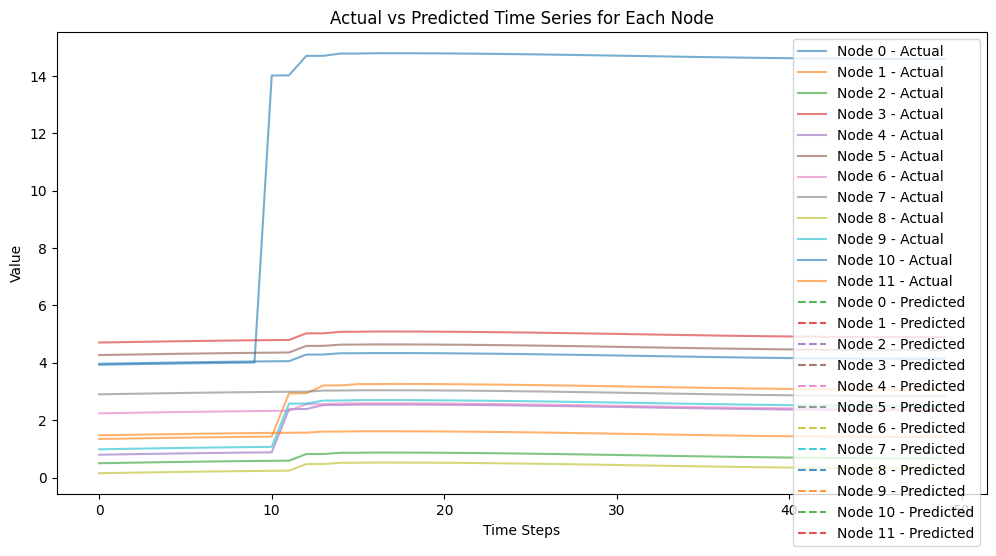

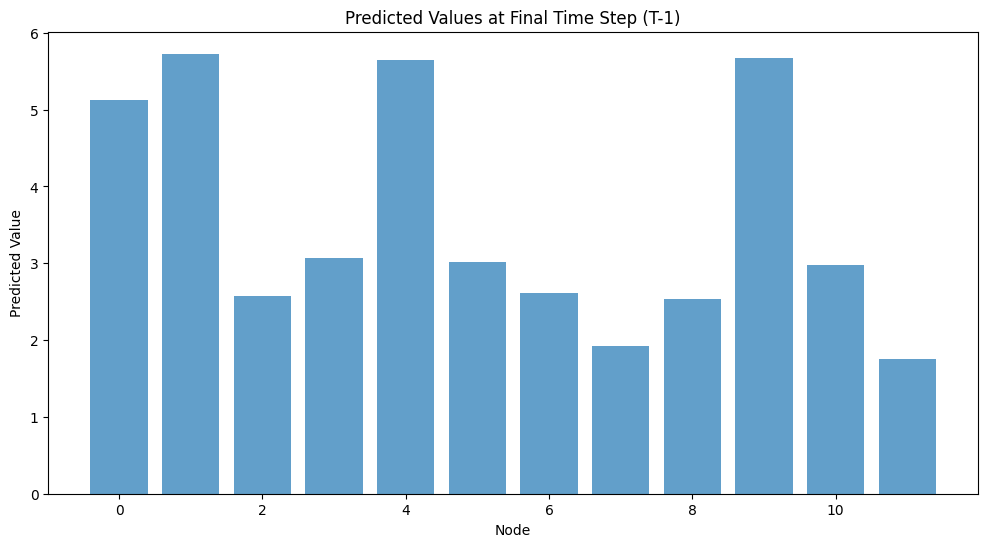

In [89]:
# After training the model

# Get the predicted output (final predictions)
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    predicted = model(data)  # Shape: (k, T)

# Plot the actual vs predicted time series for each node
plt.figure(figsize=(12, 6))

# Plot the actual time series data
for i in range(k):
    plt.plot(time_series_data[i], label=f"Node {i} - Actual", alpha=0.6)

# Plot the predicted time series data
for i in range(k):
    plt.plot(predicted[i].numpy(), label=f"Node {i} - Predicted", linestyle='--', alpha=0.8)

plt.xlabel("Time Steps")
plt.ylabel("Value")
plt.title("Actual vs Predicted Time Series for Each Node")
plt.legend()
plt.show()

# Optionally, if you want to display the final prediction at the last time step (T-1)
final_predictions = predicted[:, -1].numpy()

plt.figure(figsize=(12, 6))
plt.bar(range(k), final_predictions, alpha=0.7, label='Predicted Values at Time Step T-1')
plt.xlabel("Node")
plt.ylabel("Predicted Value")
plt.title("Predicted Values at Final Time Step (T-1)")
plt.show()


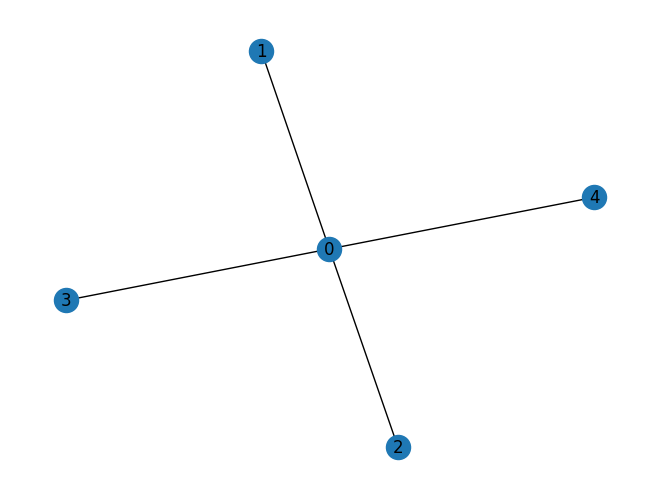

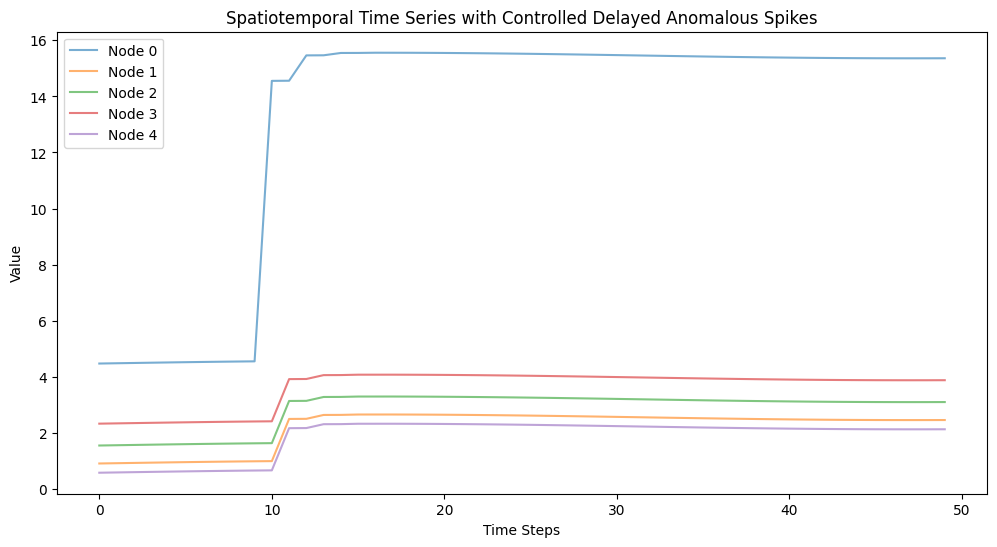

/Users/shreyansen/.pyenv/versions/3.10.4/envs/cookbook/lib/python3.10/site-packages/torch/nn/modules/loss.py:538: UserWarning: Using a target size (torch.Size([45, 5])) that is different to the input size (torch.Size([45, 5, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


RuntimeError: The size of tensor a (5) must match the size of tensor b (45) at non-singleton dimension 1

In [113]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv

# Parameters
k = 5  # Number of nodes
T = 50  # Time steps
start_node = 0  # Node where the anomaly will start
anomaly_start_time = 10  # Time when the anomaly starts at start_node
anomaly_decay_rate = 0.15  # Rate at which the anomaly decays as it spreads
anomaly_magnitude = 10  # Magnitude of the initial anomaly
max_anomaly_per_node = 50  # Maximum anomaly each node can experience (to avoid runaway)

# Create the graph (Barabási-Albert model)
G = nx.barabasi_albert_graph(k, m=1)  # m=2 means each new node attaches to 2 existing nodes
nx.draw(G, with_labels=True)

# Generate time series for each node with a controlled, delayed anomaly propagation
def generate_spatiotemporal_series(k, T, anomaly_start_time, anomaly_magnitude, anomaly_decay_rate, max_anomaly_per_node):
    time_series = np.zeros((k, T))
    
    # For simplicity, let's initialize the nodes with random values
    node_values = np.random.rand(k) * 5
    
    # Create a list to track the amount of anomaly that reaches each node at each time step
    anomaly_propagation = np.zeros((k, T))  # This will track how the anomaly spreads over time
    
    # Introduce the anomaly at the start node at the specified time
    anomaly_propagation[start_node, anomaly_start_time:] = anomaly_magnitude
    time_series[start_node, anomaly_start_time:] += anomaly_magnitude

    # Spread the anomaly to neighboring nodes with a delay over multiple time steps
    for t in range(anomaly_start_time + 1, T):
        for node in range(k):
            # For each node, check if it was affected in previous time steps
            for neighbor in G.neighbors(node):
                # If the neighbor had an anomaly at time t-1, this node will now start receiving it
                if anomaly_propagation[neighbor, t - 1] > 0:
                    # Spread the anomaly with a controlled decay rate to the current node
                    new_anomaly = anomaly_propagation[neighbor, t - 1] * anomaly_decay_rate
                    
                    # Cap the anomaly to avoid runaway values
                    if anomaly_propagation[node, t] + new_anomaly > max_anomaly_per_node:
                        new_anomaly = max_anomaly_per_node - anomaly_propagation[node, t]
                    
                    anomaly_propagation[node, t] += new_anomaly
                    time_series[node, t] += new_anomaly
    
    # Add the normal fluctuation (without anomaly) to each node
    for t in range(T):
        for node in range(k):
            time_series[node, t] += node_values[node] + np.sin(t / 10) * 0.1  # Normal fluctuation
    
    return time_series

# Generate time series with delayed anomalies
time_series_data = generate_spatiotemporal_series(k, T, anomaly_start_time, anomaly_magnitude, anomaly_decay_rate, max_anomaly_per_node)

# Plot the time series for the nodes
plt.figure(figsize=(12, 6))
for i in range(k):
    plt.plot(time_series_data[i], label=f"Node {i}", alpha=0.6)
plt.xlabel("Time Steps")
plt.ylabel("Value")
plt.title("Spatiotemporal Time Series with Controlled Delayed Anomalous Spikes")
plt.legend()
plt.show()

# Convert the time series into a format suitable for graph neural networks
# Create PyTorch tensors for features and adjacency
x = torch.tensor(time_series_data.T, dtype=torch.float)  # (T x k), each row is a time step
edge_index = torch.tensor(np.array(list(G.edges())).T, dtype=torch.long)  # (2 x E), graph connectivity

# Create a Data object for PyTorch Geometric
data = Data(x=x, edge_index=edge_index)

# Create a sliding window of past 5 time steps to predict the next time step
def create_sequences(time_series_data, window_size=5):
    X, y = [], []
    for t in range(window_size, time_series_data.shape[1]):
        X.append(time_series_data[:, t-window_size:t].T)  # Last 5 time steps
        y.append(time_series_data[:, t])  # Target is the next time step
    return np.array(X), np.array(y)

# Prepare the data for training
X, y = create_sequences(time_series_data, window_size=5)

# Convert to torch tensors
X_train = torch.tensor(X, dtype=torch.float32)
y_train = torch.tensor(y, dtype=torch.float32)

# Define a simple GNN model with two GCN layers
class GNNModel(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(GNNModel, self).__init__()
        self.conv1 = GCNConv(in_channels, 16)
        self.conv2 = GCNConv(16, 32)
        self.fc = nn.Linear(32, out_channels)  # Predict the next time step

    def forward(self, data):
        x, edge_index = data.x, data.edge_index  # Node features and graph structure
        x = torch.relu(self.conv1(x, edge_index))  # Apply first GCN layer
        x = torch.relu(self.conv2(x, edge_index))  # Apply second GCN layer
        x = self.fc(x)  # Final output layer to predict the next time step
        return x

# Initialize the model
model = GNNModel(in_channels=5, out_channels=1)  # 5 time steps to predict 1 future value

# Define the loss function and optimizer
criterion = nn.MSELoss()  # Mean Squared Error loss for regression tasks
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
epochs = 200
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()

    # Forward pass (model takes a batch of data)
    output = model(Data(x=X_train, edge_index=edge_index))  # Get predictions for the next time step
    
    # Calculate loss (MSE between predictions and actual next time steps)
    loss = criterion(output, y_train)

    # Backward pass and optimization
    loss.backward()
    optimizer.step()

    if epoch % 20 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

# Get the predicted output for the entire time series
model.eval()
with torch.no_grad():
    predicted = model(Data(x=X_train, edge_index=edge_index))  # Predicted future values

# Plot the predictions against the actual values
plt.figure(figsize=(12, 6))
for i in range(k):
    plt.plot(range(5, T), predicted[i].numpy(), label=f"Node {i} - Predicted", alpha=0.6)
    plt.plot(range(5, T), time_series_data[i, 5:], label=f"Node {i} - Actual", linestyle='--', alpha=0.6)

plt.xlabel("Time Steps")
plt.ylabel("Value")
plt.title("Predicted vs Actual Time Series")
plt.legend()
plt.show()


Epoch 0, Loss: 76.16667938232422
Epoch 20, Loss: 11.458344459533691
Epoch 40, Loss: 9.67585563659668
Epoch 60, Loss: 9.444808006286621
Epoch 80, Loss: 9.370230674743652
Epoch 100, Loss: 9.324792861938477
Epoch 120, Loss: 9.284103393554688
Epoch 140, Loss: 9.242279052734375
Epoch 160, Loss: 9.198097229003906
Epoch 180, Loss: 9.157291412353516


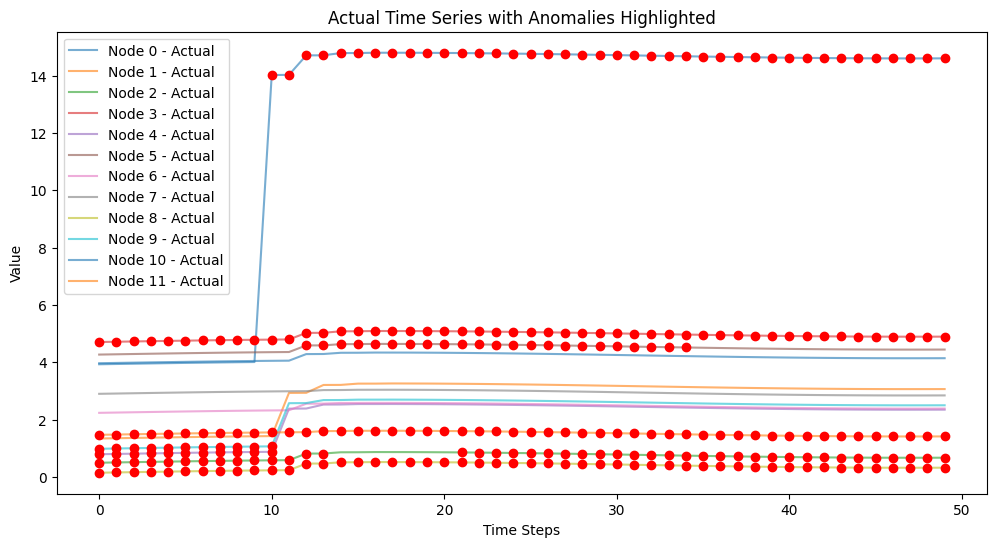

In [101]:


# Define the GNN model
class GNNModel(torch.nn.Module):
    def __init__(self, in_channels, out_channels):
        super(GNNModel, self).__init__()
        self.conv1 = GCNConv(in_channels, 16)
        self.conv2 = GCNConv(16, out_channels)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = torch.relu(self.conv1(x, edge_index))
        x = self.conv2(x, edge_index)
        return x

# Initialize the model with the input and output channels based on the time series data (T = number of time steps)
model = GNNModel(in_channels=T, out_channels=T)  # Predict the full time series (one per node)

# Define the loss function and optimizer
criterion = torch.nn.MSELoss()  # Mean Squared Error loss for regression tasks
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Training loop (same as before)
epochs = 200
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()

    # Forward pass
    output = model(data)
    
    # Assume that our labels are the time series data itself (prediction task)
    loss = criterion(output, data.x)  # The model will predict node values (x) over time
    
    # Backward pass and optimization
    loss.backward()
    optimizer.step()
    
    if epoch % 20 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

# Get the predicted output for the entire time series
model.eval()
with torch.no_grad():
    predicted = model(data)  # Shape: (k, T)

# Convert time_series_data to a tensor if it is a numpy array
time_series_data_tensor = torch.tensor(time_series_data, dtype=torch.float32)

# Calculate the mean and std of the predicted values for each node across all time steps
mean_predicted = predicted.mean(dim=1)  # Mean across time steps for each node
std_predicted = predicted.std(dim=1)  # Standard deviation across time steps for each node

# Calculate z-scores for each time step (based on predicted mean and std)
z_scores = (time_series_data_tensor - mean_predicted[:, None]) / std_predicted[:, None]

# Detect anomalies where z-score exceeds 3 (or any other threshold)
threshold = 3
anomalies = (torch.abs(z_scores) > threshold)

# Visualize detected anomalies
plt.figure(figsize=(12, 6))

for i in range(k):
    # Plot the actual time series data
    plt.plot(time_series_data_tensor[i], label=f"Node {i} - Actual", alpha=0.6)
    
    # Highlight the anomalies
    anomaly_times = torch.nonzero(anomalies[i], as_tuple=True)[0].numpy()
    for t in anomaly_times:
        plt.scatter(t, time_series_data_tensor[i, t], color='red', zorder=5)  # Mark anomalies

plt.xlabel("Time Steps")
plt.ylabel("Value")
plt.title("Actual Time Series with Anomalies Highlighted")
plt.legend()
plt.show()
